In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split , cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score

In [3]:
df = pd.read_csv('/content/diabetes.csv')
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
158,2,88,74,19,53,29.0,0.229,22,0
421,2,94,68,18,76,26.0,0.561,21,0
168,4,110,66,0,0,31.9,0.471,29,0
43,9,171,110,24,240,45.4,0.721,54,1
310,6,80,66,30,0,26.2,0.313,41,0


In [4]:
df.shape

(768, 9)

In [5]:
# blood pressure, skinthickness and bmi cannot be zero, zero will be treated as na
zero_cols = ['BloodPressure','SkinThickness','BMI']
for i in zero_cols:
    df[i] = df[i].replace(0,np.nan)

In [6]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,35
SkinThickness,227
Insulin,0
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   768 non-null    int64  
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 54.1 KB


In [9]:
df.drop('DiabetesPedigreeFunction',axis=1,inplace=True)

In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
count,768.000000,768.000000,733.000000,541.000000,768.000000,757.000000,768.000000,768.000000
mean,3.845052,120.894531,72.405184,29.153420,79.799479,32.457464,33.240885,0.348958
std,3.369578,31.972618,12.382158,10.476982,115.244002,6.924988,11.760232,0.476951
min,0.000000,0.000000,24.000000,7.000000,0.000000,18.200000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,0.000000,27.500000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,30.500000,32.300000,29.000000,0.000000
75%,6.000000,140.250000,80.000000,36.000000,127.250000,36.600000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,81.000000,1.000000


In [11]:
df.select_dtypes(include=['int','float']).corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
Pregnancies,1.000000,0.129459,0.214178,0.100239,-0.073535,0.021719,0.544341,0.221898
Glucose,0.129459,1.000000,0.221436,0.211354,0.331357,0.219290,0.263514,0.466581
BloodPressure,0.214178,0.221436,1.000000,0.226839,-0.047375,0.289230,0.330107,0.170589
SkinThickness,0.100239,0.211354,0.226839,1.000000,0.126423,0.648214,0.166816,0.259491
Insulin,-0.073535,0.331357,-0.047375,0.126423,1.000000,0.185357,-0.042163,0.130548
BMI,0.021719,0.219290,0.289230,0.648214,0.185357,1.000000,0.025841,0.313680
Age,0.544341,0.263514,0.330107,0.166816,-0.042163,0.025841,1.000000,0.238356
Outcome,0.221898,0.466581,0.170589,0.259491,0.130548,0.313680,0.238356,1.000000


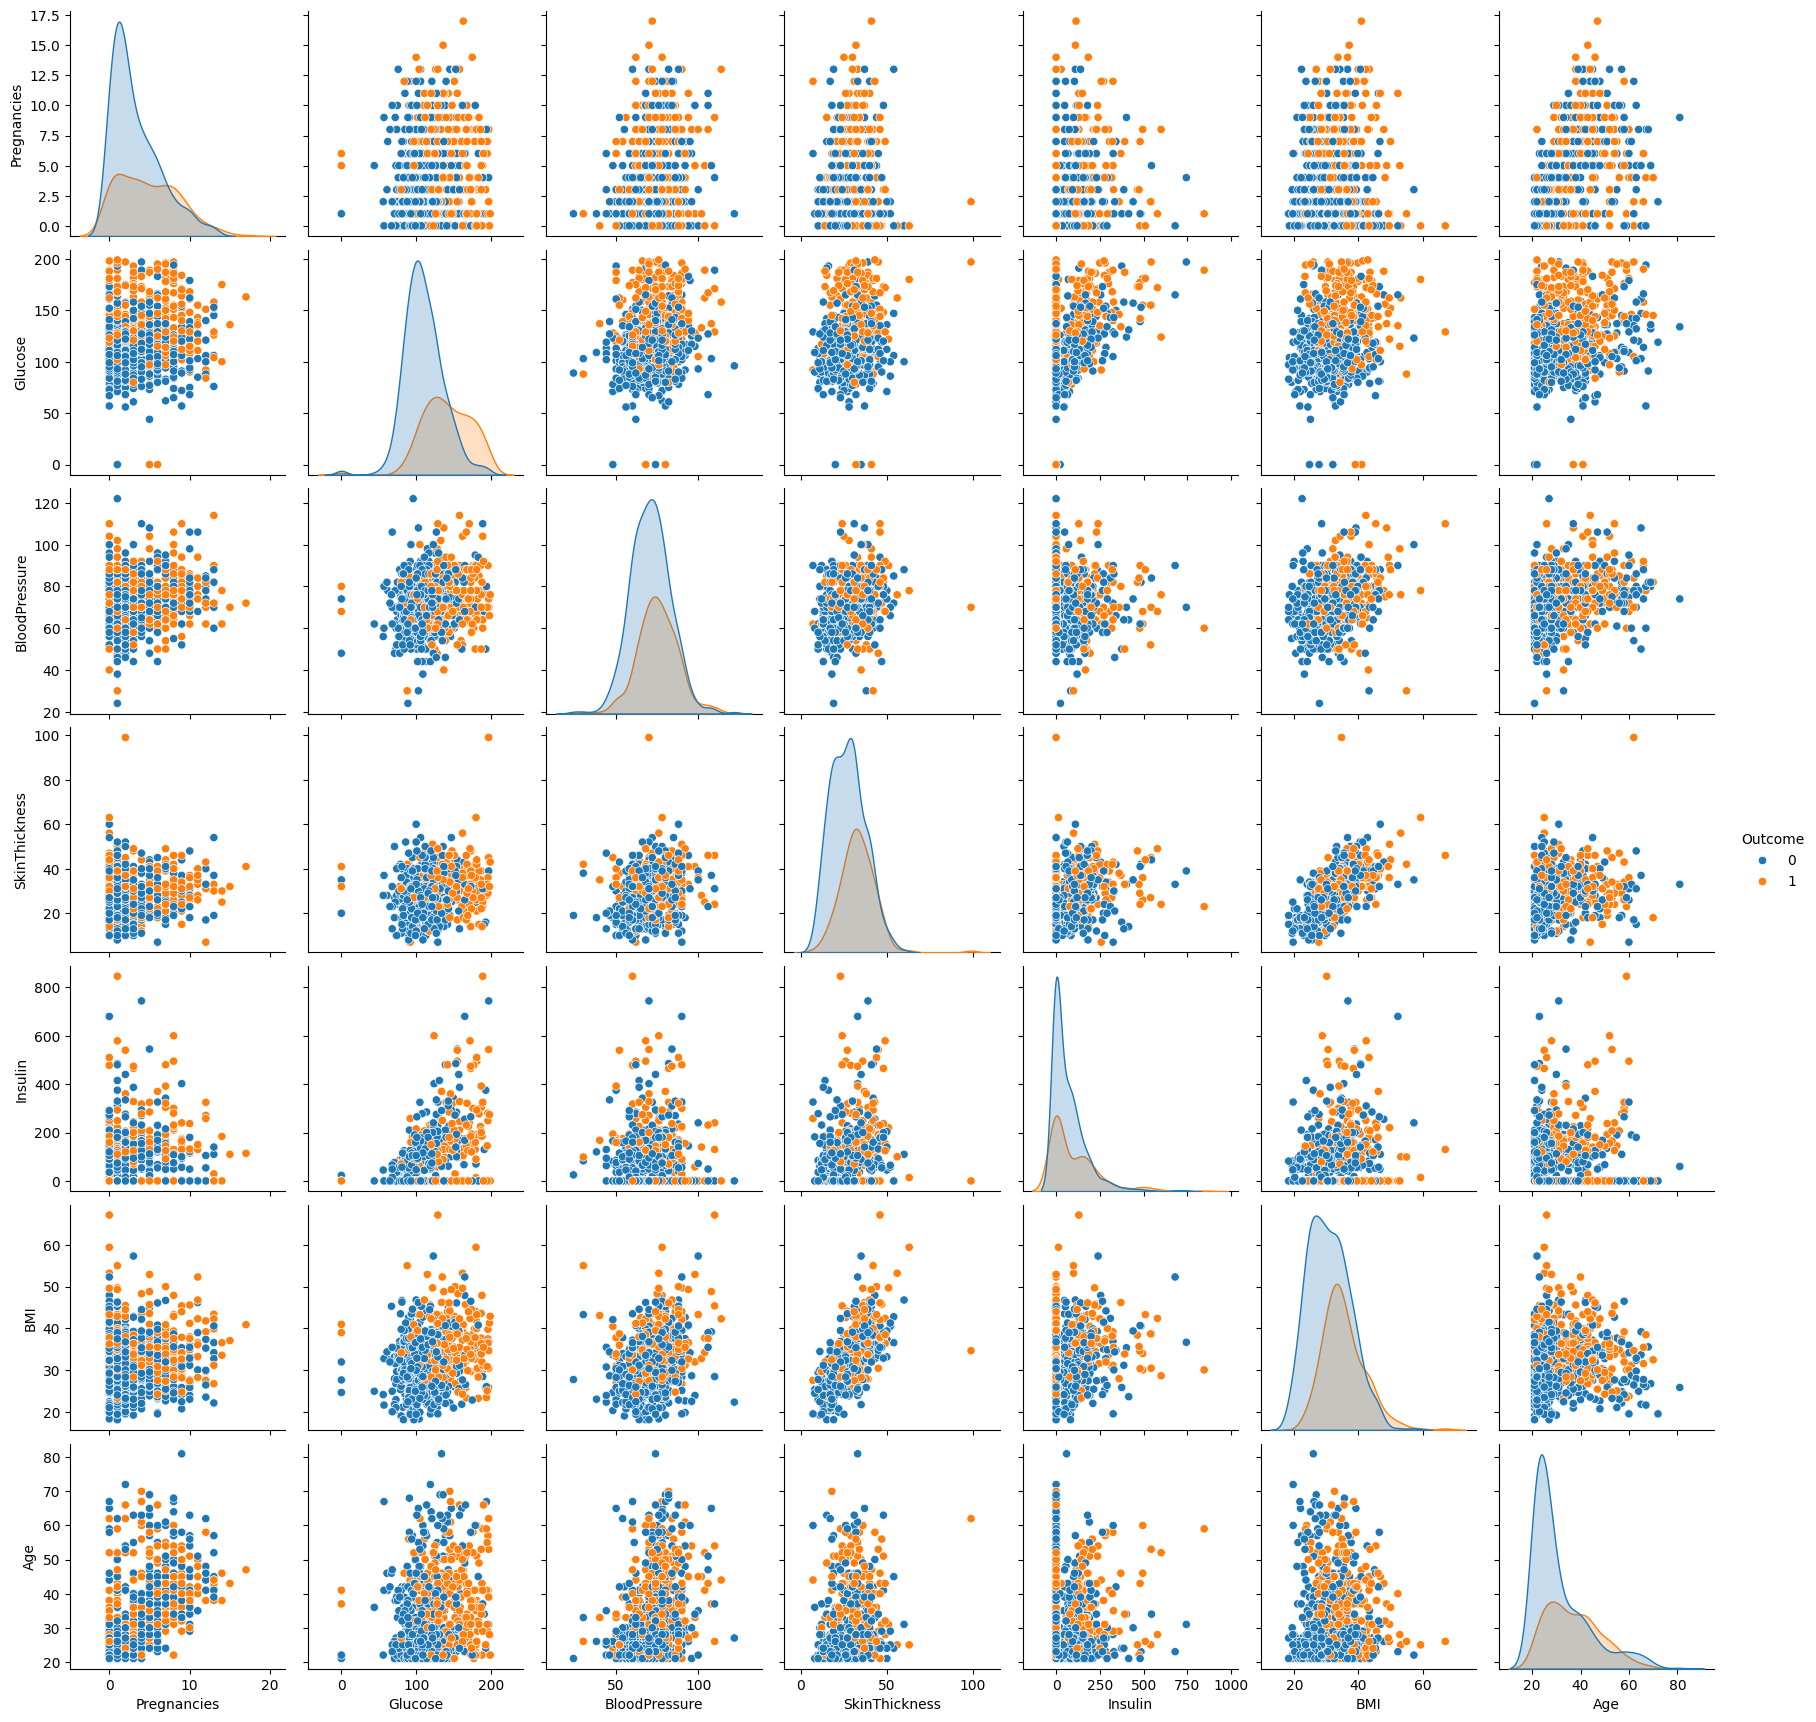

In [12]:
sns.pairplot(df, hue='Outcome')

# pregnencies col

In [13]:
print(df['Pregnancies'].nunique())
print(df['Pregnancies'].value_counts())

17
Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
17      1
15      1
Name: count, dtype: int64


<Axes: xlabel='Pregnancies', ylabel='Density'>

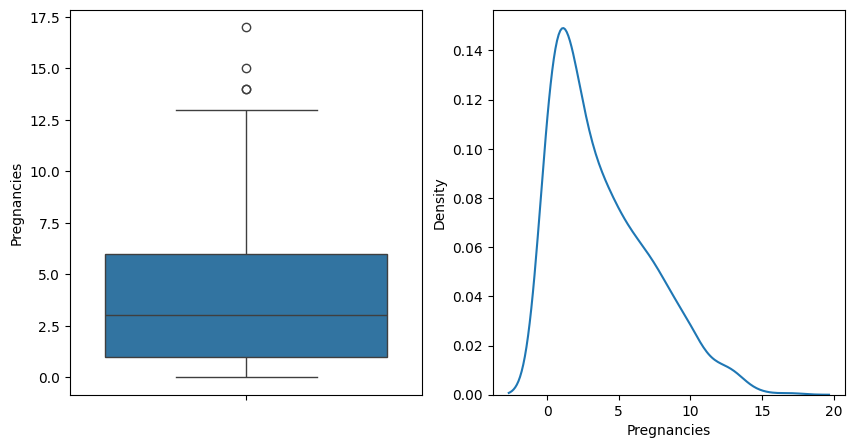

In [14]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.boxplot(df['Pregnancies'])
plt.subplot(122)
sns.kdeplot(df['Pregnancies'])

In [15]:
for i in df['Pregnancies'].unique():
    if df[df['Pregnancies'] == i].shape[0] <= 2:
        df = df[df['Pregnancies'] != i]

<Axes: ylabel='Density'>

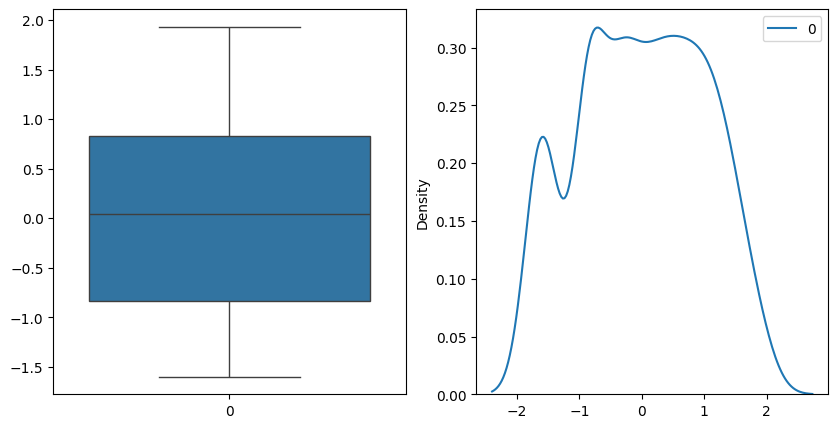

In [16]:
pt = PowerTransformer()
exp_preg = pt.fit_transform(df[['Pregnancies']])
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.boxplot(exp_preg)
plt.subplot(122)
sns.kdeplot(exp_preg)

In [17]:
df.shape

(764, 8)

# Gloucose

<Axes: xlabel='Glucose', ylabel='Density'>

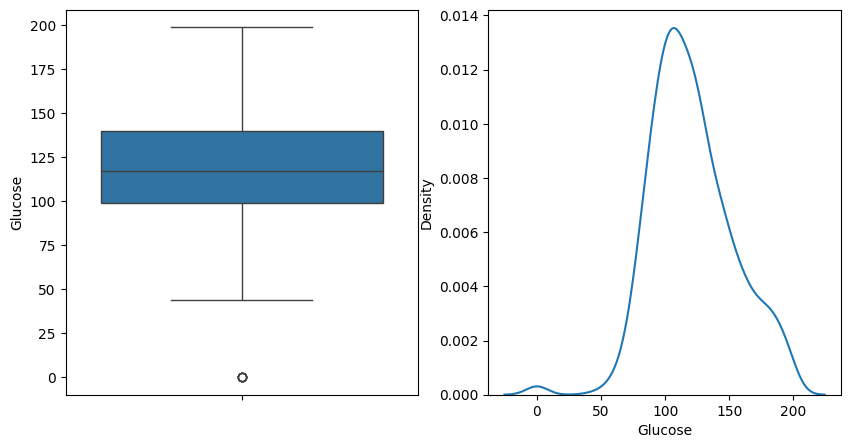

In [18]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.boxplot(df['Glucose'])
plt.subplot(122)
sns.kdeplot(df['Glucose'])

In [19]:
df = df[df['Glucose']!=0]

In [20]:
df.shape

(759, 8)

<Axes: xlabel='Glucose', ylabel='Density'>

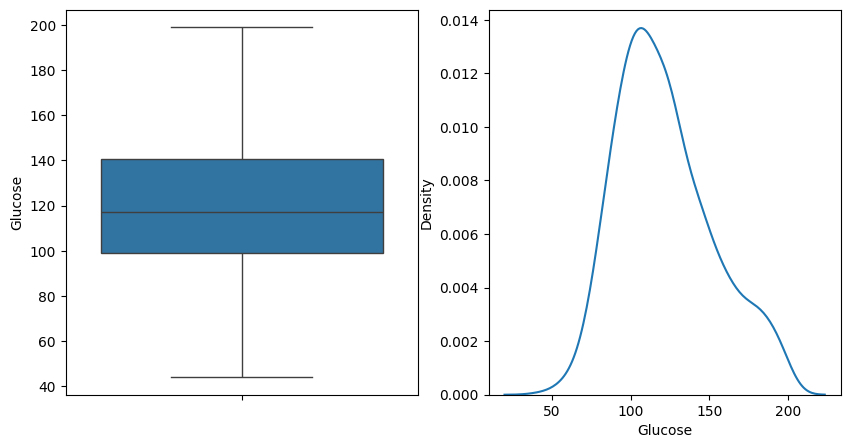

In [21]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.boxplot(df['Glucose'])
plt.subplot(122)
sns.kdeplot(df['Glucose'])

# Blood Pressure

<Axes: xlabel='BloodPressure', ylabel='Density'>

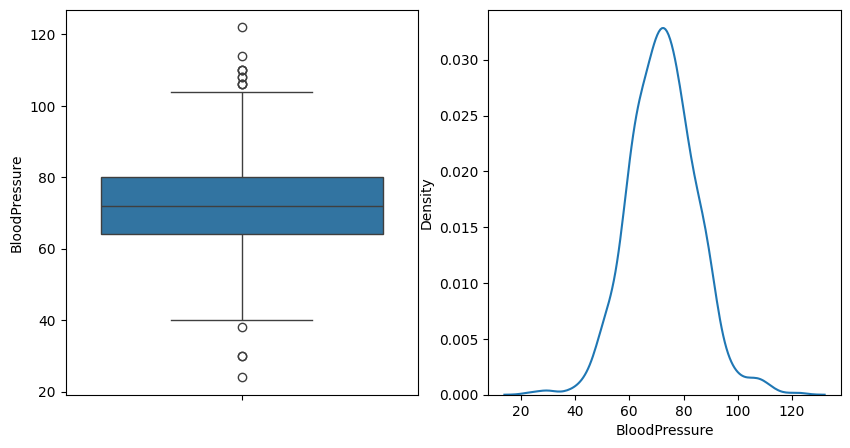

In [22]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.boxplot(df['BloodPressure'])
plt.subplot(122)
sns.kdeplot(df['BloodPressure'])

In [23]:
df['BloodPressure'].var()

154.0623915850926

<Axes: xlabel='BloodPressure', ylabel='Density'>

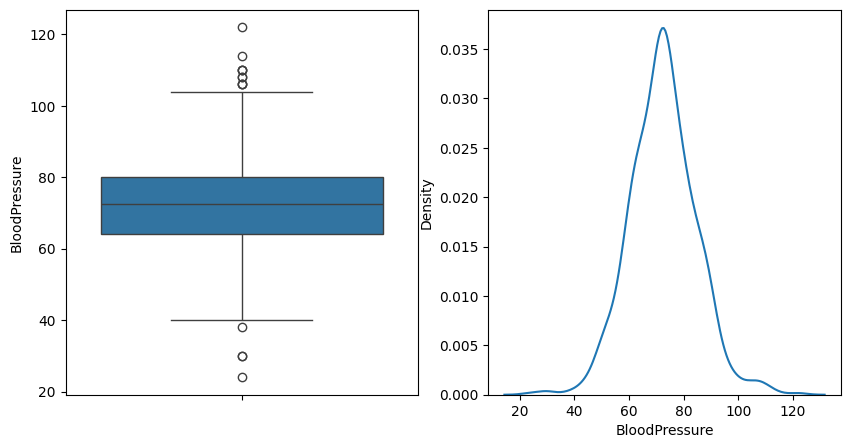

In [24]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.boxplot(df['BloodPressure'].fillna(df['BloodPressure'].mean()))
plt.subplot(122)
sns.kdeplot(df['BloodPressure'].fillna(df['BloodPressure'].mean()))

In [25]:
df['BloodPressure'].fillna(df['BloodPressure'].mean()).var()

146.94869276520066

In [26]:
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].mean())

In [27]:
df.shape

(759, 8)

In [28]:
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,227
Insulin,0
BMI,11
Age,0
Outcome,0


# skin thickness

<Axes: xlabel='SkinThickness', ylabel='Density'>

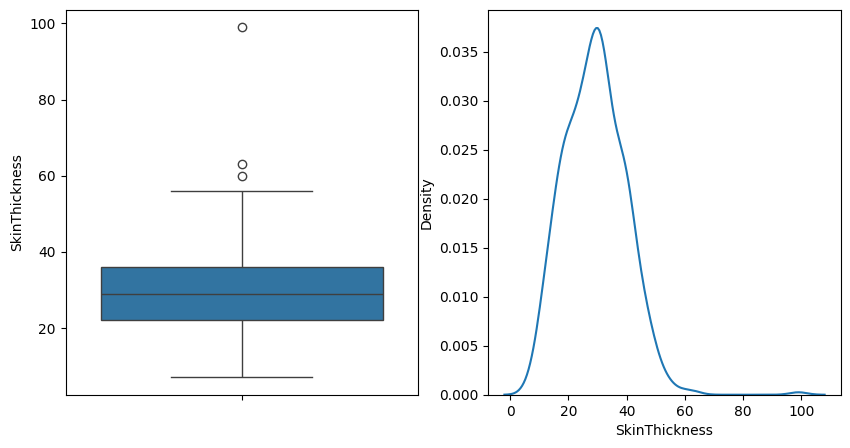

In [29]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.boxplot(df['SkinThickness'])
plt.subplot(122)
sns.kdeplot(df['SkinThickness'])

In [30]:
skin_outlier = [60,63,99]
for i in skin_outlier:
    df = df[df['SkinThickness']!=i]

In [31]:
new_skin = df['SkinThickness'].apply(lambda x: np.random.choice(df['SkinThickness'].dropna()) if np.isnan(x) else x)

<Axes: xlabel='SkinThickness', ylabel='Density'>

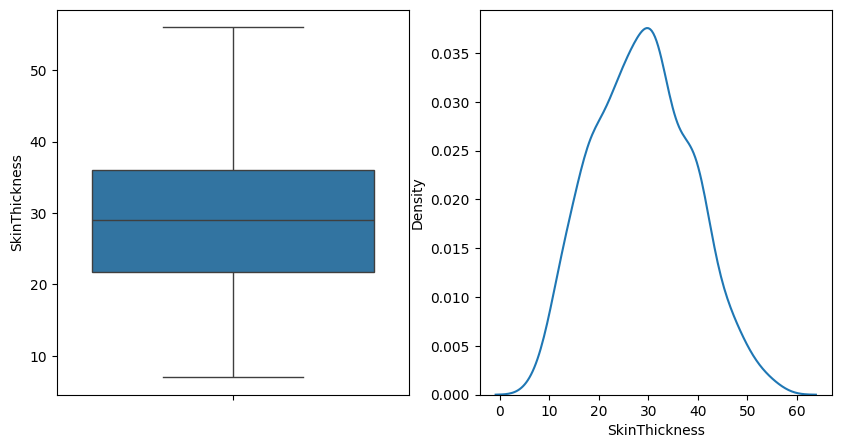

In [32]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.boxplot(new_skin)
plt.subplot(122)
sns.kdeplot(new_skin)

In [33]:
df['SkinThickness'] = df['SkinThickness'].apply(lambda x: np.random.choice(df['SkinThickness'].dropna()) if np.isnan(x) else x)

# insulin col

<Axes: xlabel='Insulin', ylabel='Density'>

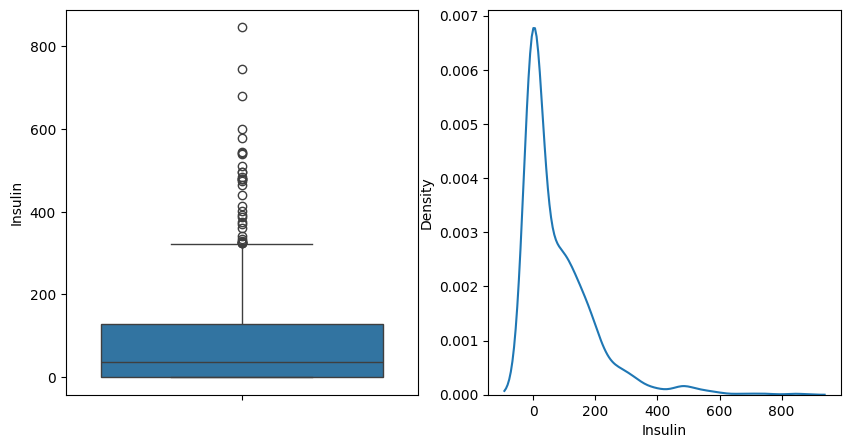

In [34]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.boxplot(df['Insulin'])
plt.subplot(122)
sns.kdeplot(df['Insulin'])

In [35]:
df[df['Insulin'] > 600]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
13,1,189,60.0,23.0,846,30.1,59,1
228,4,197,70.0,39.0,744,36.7,31,0
247,0,165,90.0,33.0,680,52.3,23,0


In [36]:
df = df[df['Insulin']<600]

In [37]:
df.shape

(752, 8)

# bmi col

<Axes: xlabel='BMI', ylabel='Density'>

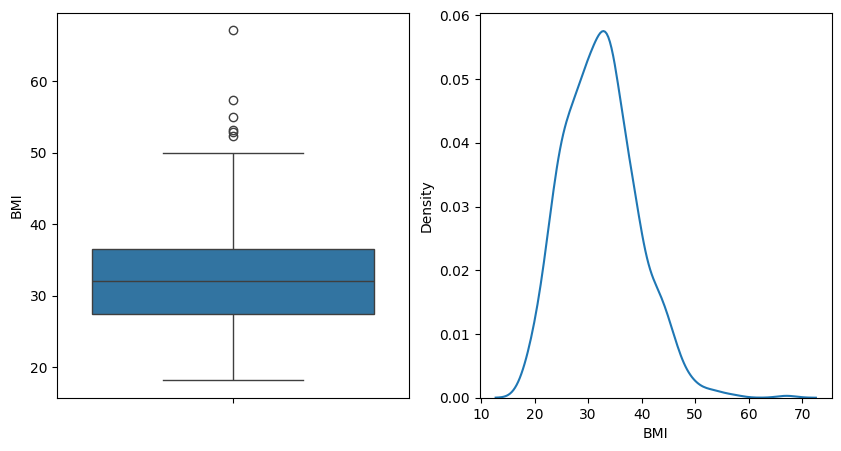

In [38]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.boxplot(df['BMI'])
plt.subplot(122)
sns.kdeplot(df['BMI'])

In [39]:
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())

In [40]:
df = df[df['BMI']<60]

In [41]:
df.shape

(751, 8)

# age col

<Axes: xlabel='Age', ylabel='Density'>

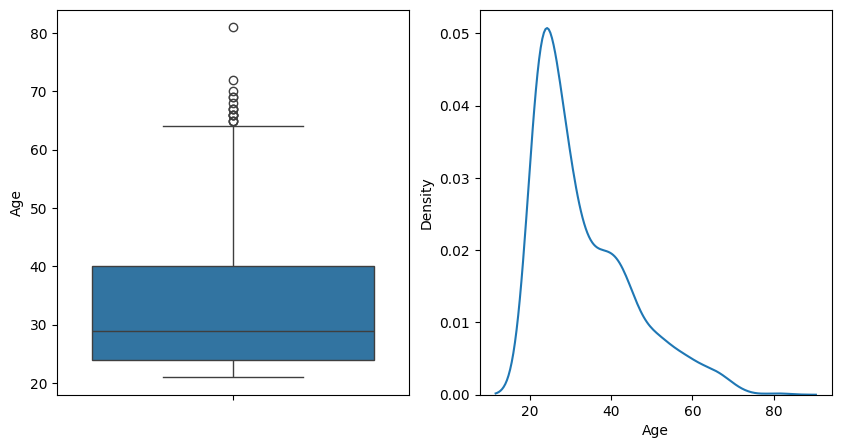

In [42]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.boxplot(df['Age'])
plt.subplot(122)
sns.kdeplot(df['Age'])

In [43]:
df = df[df['Age']<80]

# outlired treatment

In [44]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Age', 'Outcome'],
      dtype='object')

In [45]:
out_cols = ['BloodPressure','Insulin','BMI','Age']
def treat_outl(col):
    p25 = df[col].quantile(0.25)
    p75 = df[col].quantile(0.75)
    iqr = p75-p25
    upper_lim = p75+1.5*iqr
    lower_lim = p25-1.5*iqr
    df[col] = np.where(
        df[col]>upper_lim,upper_lim,
        np.where(
            df[col]<lower_lim,lower_lim,df[col]
        )
    )
for i in out_cols:
    treat_outl(i)

<ipython-input-45-912fd568f8bd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = np.where(


<Axes: xlabel='BMI', ylabel='Density'>

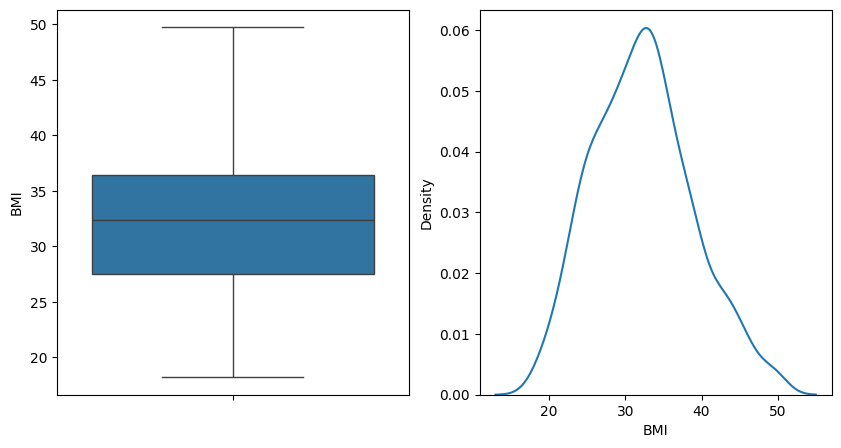

In [46]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.boxplot(df['BMI'])
plt.subplot(122)
sns.kdeplot(df['BMI'])

In [47]:
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
606,1,181,78.0,42.0,293.0,40.000000,22.0,1
576,6,108,44.0,20.0,130.0,24.000000,35.0,0
371,0,118,64.0,23.0,89.0,32.346829,21.0,0
184,4,141,74.0,32.0,0.0,27.600000,40.0,0
398,3,82,70.0,39.0,0.0,21.100000,25.0,0


In [49]:
df.to_csv('preprocessed_data.csv')

# training model

In [109]:
X_train,X_test,y_train,y_test = train_test_split(df.drop('Outcome',axis=1),df['Outcome'],test_size=0.2,random_state=93)

In [110]:
print(X_train.shape,X_test.shape)

(600, 7) (150, 7)


# logistic regression

In [111]:
log_model = LogisticRegression()
log_pipe = Pipeline([
    ('scaler',StandardScaler()),
    ('model',log_model)
])
log_pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LogisticRegression())])

In [112]:
log_ypred = log_pipe.predict(X_test)
print('acc',accuracy_score(y_test,log_ypred))
print('precision',precision_score(y_test,log_ypred))
print('recall',recall_score(y_test,log_ypred))
print('f1',f1_score(y_test,log_ypred))

acc 0.86
precision 0.7391304347826086
recall 0.7906976744186046
f1 0.7640449438202247


In [113]:
cross_val_score(log_pipe,X_train,y_train,scoring='accuracy',cv=3).mean()

np.float64(0.745)

In [107]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,log_ypred)

array([[96, 10],
       [17, 27]])

# k neighbor

In [ ]:
knn = KNeighborsClassifier()
knn_pipe = Pipeline([
    ('scaler',StandardScaler()),
    ('model',knn)
])
knn_pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', KNeighborsClassifier())])

In [ ]:
knn_pred = knn_pipe.predict(X_test)
print('acc',accuracy_score(y_test,knn_pred))
print('precision',precision_score(y_test,knn_pred))
print('recall',recall_score(y_test,knn_pred))
print('f1',f1_score(y_test,knn_pred))
# on  split 783

acc 0.82
precision 0.7551020408163265
recall 0.7115384615384616
f1 0.7326732673267327


In [ ]:
cross_val_score(knn_pipe,X_train,y_train,scoring='accuracy',cv=5).mean()

np.float64(0.7050000000000001)

In [ ]:
confusion_matrix(y_test,knn_pred)

array([[74, 30],
       [27, 19]])

# SVC

In [ ]:
svc = SVC(probability=True)
svc_pipe = Pipeline([
    ('scaler',StandardScaler()),
    ('model',svc)
])
svc_pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC(probability=True))])

In [ ]:
svc_pred = svc_pipe.predict(X_test)
print('acc',accuracy_score(y_test,svc_pred))
print('precision',precision_score(y_test,svc_pred))
print('recall',recall_score(y_test,svc_pred))
print('f1',f1_score(y_test,svc_pred))
# on  split 241

acc 0.7933333333333333
precision 0.7837837837837838
recall 0.5576923076923077
f1 0.651685393258427


In [ ]:
cross_val_score(svc_pipe,X_train,y_train,scoring='accuracy',cv=5).mean()

np.float64(0.7300000000000001)

# random forest

In [ ]:
rnd = RandomForestClassifier(n_estimators=150,max_leaf_nodes=6)
rnd_pipe = Pipeline([
    ('scaler',StandardScaler()),
    ('model',rnd)
])
rnd_pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 RandomForestClassifier(max_leaf_nodes=6, n_estimators=150))])

In [ ]:
# param = {
#     'model__n_estimators':[100,150,200,250],
#     'model__max_leaf_nodes':[6,8,10]
# }
# search = GridSearchCV(rnd_pipe,param_grid=param,cv=3,n_jobs=-1,scoring='accuracy')
# search.fit(X_train,y_train)

In [ ]:
rnd_pred = rnd_pipe.predict(X_test)
print('acc',accuracy_score(y_test,rnd_pred))
print('precision',precision_score(y_test,rnd_pred))
print('recall',recall_score(y_test,rnd_pred))
print('f1',f1_score(y_test,rnd_pred))
# on  split 203

acc 0.82
precision 0.7272727272727273
recall 0.5714285714285714
f1 0.64


In [ ]:
cross_val_score(rnd_pipe,X_train,y_train,scoring='accuracy',cv=5).mean()

np.float64(0.7466666666666667)

# voting

In [ ]:
voting_clf = VotingClassifier(
    estimators=[('log',log_model),('knn',knn),('svc',svc),('rnd',rnd)],
    voting='soft'
)
vot_pipe = Pipeline([
    ('scaler',StandardScaler()),
    ('model',voting_clf)
])
vot_pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 VotingClassifier(estimators=[('log', LogisticRegression()),
                                              ('knn', KNeighborsClassifier()),
                                              ('svc', SVC(probability=True)),
                                              ('rnd',
                                               RandomForestClassifier(max_leaf_nodes=6,
                                                                      n_estimators=150))],
                                  voting='soft'))])

In [ ]:
vot_pred = vot_pipe.predict(X_test)
print('acc',accuracy_score(y_test,vot_pred))
print('precision',precision_score(y_test,vot_pred))
print('recall',recall_score(y_test,vot_pred))
print('f1',f1_score(y_test,vot_pred))
# at 447

acc 0.8466666666666667
precision 0.7804878048780488
recall 0.6956521739130435
f1 0.735632183908046


In [ ]:
cross_val_score(vot_pipe,X_train,y_train,scoring='accuracy',cv=5).mean()

np.float64(0.7366666666666667)

# ada boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=300,algorithm='SAMME',learning_rate=0.5)
ada_pipe = Pipeline([
    ('scaler',StandardScaler()),
    ('model',ada)
])
ada_pipe.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 AdaBoostClassifier(algorithm='SAMME',
                                    estimator=DecisionTreeClassifier(max_depth=1),
                                    learning_rate=0.5, n_estimators=300))])

In [ ]:
ada_pred = ada_pipe.predict(X_test)
print('acc',accuracy_score(y_test,ada_pred))
print('precision',precision_score(y_test,ada_pred))
print('recall',recall_score(y_test,ada_pred))
print('f1',f1_score(y_test,ada_pred))

acc 0.7933333333333333
precision 0.6744186046511628
recall 0.6304347826086957
f1 0.651685393258427


# gradient

In [72]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(max_depth=2, n_estimators=3,learning_rate=1)
gbrt_pipe = Pipeline([
    ('scaler',StandardScaler()),
    ('model',gbrt)
])
gbrt_pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 GradientBoostingClassifier(learning_rate=1, max_depth=2,
                                            n_estimators=3))])

In [73]:
gbrt_pred = gbrt_pipe.predict(X_test)
print('acc',accuracy_score(y_test,gbrt_pred))
print('precision',precision_score(y_test,gbrt_pred))
print('recall',recall_score(y_test,gbrt_pred))
print('f1',f1_score(y_test,gbrt_pred))

acc 0.8066666666666666
precision 0.71875
recall 0.5348837209302325
f1 0.6133333333333333


# best split acc

In [75]:
def calculate_split(model):
    test_score = []
    train_score = []
    for i in range(1000):
        X_train,X_test,y_train,y_test = train_test_split(df.drop('Outcome',axis=1),df['Outcome'],test_size=0.2,random_state=i)
        log_model = LogisticRegression()
        log_pipe = Pipeline([
            ('scaler',StandardScaler()),
            ('model',model)
        ])
        log_pipe.fit(X_train,y_train)
        log_testpred = log_pipe.predict(X_test)
        test_score.append(accuracy_score(y_test,log_testpred))

        log_trainpred = log_pipe.predict(X_train)
        train_score.append(accuracy_score(y_train,log_trainpred))
    return test_score, train_score

In [76]:
test,train = calculate_split(log_model)

In [101]:
for i in range(1000):
    if train[i]>0.76 and test[i]>0.80:
        print(i,'==',train[i],test[i])

27 == 0.765 0.8066666666666666
28 == 0.7633333333333333 0.8133333333333334
128 == 0.7633333333333333 0.8066666666666666
186 == 0.7633333333333333 0.8133333333333334
216 == 0.7616666666666667 0.8066666666666666
279 == 0.7616666666666667 0.8066666666666666
280 == 0.7633333333333333 0.8066666666666666
312 == 0.7616666666666667 0.8066666666666666
387 == 0.7666666666666667 0.8066666666666666
483 == 0.7616666666666667 0.8133333333333334
585 == 0.7633333333333333 0.8066666666666666
630 == 0.7666666666666667 0.8133333333333334
704 == 0.7616666666666667 0.8266666666666667
738 == 0.7616666666666667 0.8133333333333334
785 == 0.7633333333333333 0.82
792 == 0.7666666666666667 0.8066666666666666
814 == 0.7616666666666667 0.8066666666666666
862 == 0.7616666666666667 0.8266666666666667
921 == 0.7633333333333333 0.8133333333333334


In [108]:
np.argmax(test)

np.int64(93)

In [114]:
#logistic regression is our best model

In [115]:
import joblib
joblib.dump(log_pipe,'model.pkl')

['model.pkl']